In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms #give access to popular datasets,arch,and image transformations for CV
import  torchvision.datasets as dsets 
from torch.autograd import Variable


# Step1: Load Dataset

In [2]:

train_dataset=dsets.MNIST(root='./data', #saves the data in current working base folder and download data in this data folder
                          train=True,  #this means it is the training dataset
                          transform=transforms.ToTensor(), #remember in pytorch we deal with tensors,so converting dataset to tensor
                          download=True) #must when downloading for first time

In [4]:
len(train_dataset) #this is a list becoz we can do len only on list,there are 60000 different digits

60000

In [5]:
train_dataset[0] #looking thru this dataset,first element in a list

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
type(train_dataset[0]) #its a tuple with first index having image matrix and second as the label of it

tuple

In [10]:
train_dataset[0][0] #accessing 1st(0) element of 0 index tuple in dataset

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
#label
train_dataset[0][1] #accessing 2nd[1] element of 0 index tuple in dataset

5

In [14]:
#input matrix
train_dataset[0][0].size() #getting tensor size of 1st element of 0 index tuple
#its basically our image of size 28*28 with channel=1 since its grayscale image

torch.Size([1, 28, 28])

In [15]:
#lets see the image 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [16]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [20]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

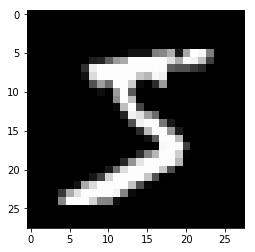

In [19]:
plt.imshow(show_img,cmap='gray')

In [51]:
#label
train_dataset[0][1]

5


# Step1b-Loading MNIST Test dataset


In [22]:
test_dataset=dsets.MNIST(root='./data' ,
                         train=False, #putting train=false inorder to get work on test dataset
                         transform=transforms.ToTensor())

In [23]:
len(test_dataset)

10000

In [25]:
type(test_dataset[0]) #everything is as per the train dataset

tuple

# Step 2-Make Dataset Iterable

In [26]:
#just make the dataset iterable

total data: 6000

minibatch:100

Lets say we will do 5 Epochs (1 Epoch:Running through whole dataset once)

Iterations=(total data/minibatch)* No. of Epochs=3000 (1 iteration:1 mini-batch forward and backward pass)

In [27]:
len(train_dataset)

60000

In [28]:
batch_size=100

In [29]:
epoch=5

# Step 2-Make data Iterable

In [31]:
#Create Iterable Object:training dataset

In [32]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True) #sequence changes from epoch to epoch

In [34]:
#Check Iterability
import collections
isinstance(train_loader,collections.Iterable) #if something is not iterable it returns false

True

In [35]:
#Create Iterable Object:training dataset

In [39]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False) #we keep it false here since we will do only one forward pass

In [40]:
#Check Iterability
import collections
isinstance(test_loader,collections.Iterable) #if something is not iterable it returns false

True

# Step 3-Building Model

In [43]:
#same as linear regression since first step in logistic regression is linear regression
class LogisticRegressionModel(nn.Module):
#     input_dim is x and output_dim is y
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear=nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out=self.Linear(x)
        return out

# Step 4-Instantiate Model CLass

In [49]:
train_dataset[0][0].size()
# flatten this one to 784 so that our model can interpret it

torch.Size([1, 28, 28])

In [47]:
input_dim=28*28 
output_dim=10
model=LogisticRegressionModel(input_dim,output_dim)

# Step 5-Instantiate a loss Class

In [54]:
#For Logistic Regression we use Cross Entropy loss

In [57]:
criterion=nn.CrossEntropyLoss() #Cross Entropy automatically computes probability alongwith cross entropy

# Step 6-Instantiate Optimizer Class

In [58]:
learning_rate=.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) 

# Prameter in Depth

In [59]:
#For Linear Regression it was simple 1D parameter

In [65]:
print(model.parameters())
print(len(list(model.parameters()))) # it returns 2 becoz pytorch considers bias automatically along with other parameters

<generator object Module.parameters at 0x000000000AE5F408>
2


In [69]:
# Wx+B
#(10,784)*(784*1)+(10,1)=(10,1)<--This is the output
#Parameters:W
print(list(model.parameters())[0].size())
#bias parameter:B
print(list(model.parameters())[1].size()) 

torch.Size([10, 784])
torch.Size([10])
